# Normal Equation

# Data

# Data matrix

The first step is to place our training samples in a **Data matrix**. We define a matrix $X$ in which the input samples $(x^{(i)})$ are placed as row vectors $(x^{(i)})^T$:

$$ X = \left[ \begin{matrix} 
x_0^{(0)} & x_1^{(0)} \\
x_0^{(1)} & x_1^{(1)} \\
\dots & \dots \\
x_0^{(m-1)} & x_1^{(m-1)}
\end{matrix} \right]
$$

Let's see how the data is put into a matrix

In [1]:
from ml import *

In [2]:
# load the data, but include a bias parameter
data = wines_quality_alcohol(bias=1, column_y = True)
X = data.train_X
y = data.train_y

By convention, we use $y$ (lower case) for a column vector that contains the true values for the target variable, in this case the quality of every bottle of wine in the training set.

By convention, $X$ (upper case) is a matrix in every row contains the values for the input variables of a training sample, in this case a bottle of wine. Here, there are two columns, the second column contains the pH-values for the wines, the first column contains a so-called bias that is always set to 1. By adding this bias column, we can simply use a matrix multiplication to estimate the quality of the wines in the training set. 

In a jupyter notebook, the value of the last expression is shown, so we can simply view $X$ and $y$ by entering these in a cell.

In [3]:
X

array([[ 1. , 12.2],
       [ 1. , 10. ],
       [ 1. , 12.8],
       ...,
       [ 1. , 12.2],
       [ 1. , 11.2],
       [ 1. ,  9.3]])

In [4]:
y

array([[7],
       [5],
       [6],
       ...,
       [6],
       [7],
       [5]])

# Model

Now that we have prepared our data in $X$ and $y$, we can use the Normal Equation to compute $\theta$:

$$ \theta = (X^TX)^{-1} \cdot X^TY $$

# Matrix operations

Under the hood, we use the **numpy** library, to store the data in matrices and efficiently perform linear algebra operations on them. Some of the operators are slightly different from what you are used, the `@` operator performs a multiplication between matrices and the `.T` transposes a matrix.

# Matrix inverse

In an equation, to the power -1 means the inverse. We won't go into details about matrix inverses, but just show hoow to compute them. 

One **very important** tip in applying the Normal Equation is to **always use the pseudo-inverse**, because the inverse of a matrix does not always give a 'numerical stable result'. Numpy contains a function to compute the pseudo-inverse: `numpy.linalg.pinv()`. So with that knowledge we can simply compute $\theta$:

# Training

In [5]:
from numpy.linalg import pinv
𝜃 = pinv( X.T @ X ) @ X.T @ y

Perhaps at the beginning of this, you would not have thought learning a model would be this easy, but sometimes applying math does make for a very elegant solution (see: the unreasonable effectiveness of mathematics (Wigner, 1960)).

#### So now we have learned $\theta$, show what the parameters to our regression line $\widehat{quality} = \theta_1 \cdot alcohol + \theta_0$ are:

In [6]:
𝜃

array([[1.82175696],
       [0.36672194]])

# Evaluate

Now that we have estimated our model $\theta$, we can use it to make predictions. For a single data point, we can compute $\theta^T \cdot x$ and for multiple data points we can add them to a data matrix $X$ and compute $X \cdot \theta$.

Initially we can plot the data using the `plot()` method. Then we can draw our linear function over it.

To plot a regression line, we compute two points. Since the min/max alcohol percentages are resp. 8 and 15, we construct a data matrix with those two points and added a bias=1 to them. Then we can simply multiply the data matrix with $\theta$ and we get predicted quality for those two points in `line_y`. 

#### On the ... fill in the code to add a table with two datapoints. The first column should be a bias column (i.e. always 1) and in the second column place 8 and 15.

In [7]:
line_X = np.array( [[1,8],[1,15]] ) 
line_y = line_X @ 𝜃
line_y

array([[4.75553246],
       [7.32258601]])

We then use Matplotlib to draw a line over the Scatter plot. In that code, `line_X[:, 1]` is the Numpy way to select only column 1 from all the rows, so leaving out the bias.

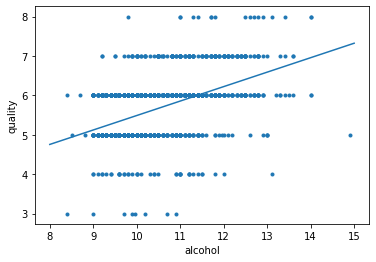

In [8]:
data.plot(x=1)
plt.plot(line_X[:, 1], line_y, '-');